In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = sns.load_dataset("penguins").dropna()

In [3]:
X = df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']]
y = df['body_mass_g']

# ENTRENAMIENTO DE MODELO DE REGRESIÓN CON ARBOLES DE DECISIÓN

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree_regresor = DecisionTreeRegressor(random_state=42,max_depth=6)
tree_regresor.fit(X_train,y_train)

y_pred = tree_regresor.predict(X_test)

# evaluación del modelo
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print(f' MAE : {mae} | R2 : {r2}')

 MAE : 289.43541497510233 | R2 : 0.7764149555697597


# EVALUAMOS CUAL ES EL MEJOR PARAMETRO DE MAX_DEPTH QUE NO CAIGA EN SOBREAJUSTE

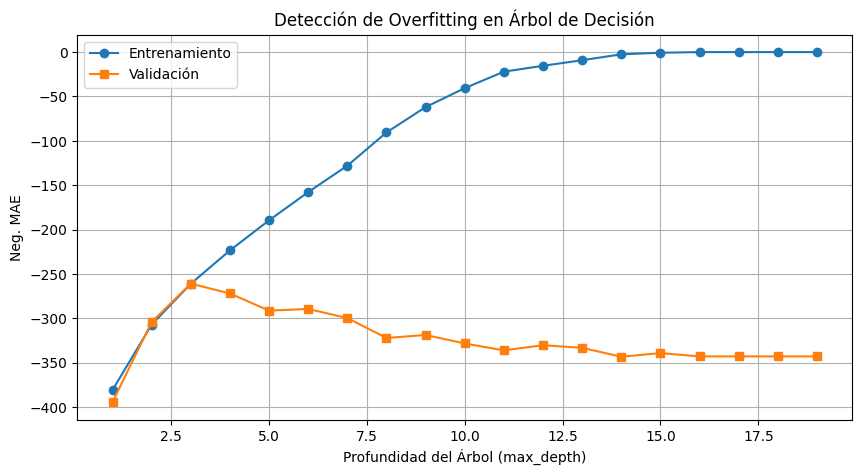

In [5]:
train_scores = []
val_scores = []
max_depths = range(1,20)

for depth in max_depths:
  model = DecisionTreeRegressor(max_depth=depth,random_state=42)
  model.fit(X_train,y_train)

  train_mae = -mean_absolute_error(y_train,model.predict(X_train))
  val_mae = -mean_absolute_error(y_test,model.predict(X_test))

  train_scores.append(train_mae)
  val_scores.append(val_mae)

# Graficamos las curvas de MAE
plt.figure(figsize=(10, 5))
plt.plot(max_depths, train_scores, label="Entrenamiento", marker='o')
plt.plot(max_depths, val_scores, label="Validación", marker='s')
plt.xlabel("Profundidad del Árbol (max_depth)")
plt.ylabel("Neg. MAE")
plt.title("Detección de Overfitting en Árbol de Decisión")
plt.legend()
plt.grid(True)
plt.show()